In [21]:

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import datetime as dt
sys.path.append('../src')
import mta_data_clean as mc

In [32]:
# Read the datafiles
data_path = '../data/'
pickle_file = 'mta_data.pickle'
busy_pickle_file = 'mta_busy_stations.pickle'
'''
data_file_list = ['turnstile_191102.txt',
                 'turnstile_191109.txt',
                 'turnstile_191116.txt',
                 'turnstile_191130.txt',
                 'turnstile_191207.txt',
                 'turnstile_191214.txt',
                 'turnstile_191221.txt',
                 'turnstile_191228.txt'
                 'turnstile_200104.txt']
'''
data_file_list = ['turnstile_190406.txt',
                 'turnstile_190413.txt']
booth_key_filename = 'Remote-Booth-Station.csv'

In [66]:
df = mc.mta_data_pickle_read(data_path+busy_pickle_file)
df.reset_index(inplace=True)

In [40]:
df.describe()

,entries,exits,deltaEntry,deltaExit
count,3.646490e+05,3.646490e+05,364649.000000,364649.000000
mean,5.863907e+07,5.350230e+07,196.661093,179.038988
std,2.574103e+08,2.503959e+08,311.406071,309.090482
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7.162760e+05,4.069420e+05,0.000000,0.000000
50%,3.590709e+06,2.239156e+06,49.000000,51.000000
75%,8.888716e+06,6.873947e+06,273.000000,232.000000
max,2.129395e+09,2.048360e+09,6552.000000,9430.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364649 entries, 0 to 1221040
Data columns (total 10 columns):
station       364649 non-null object
division      364649 non-null object
date          364649 non-null datetime64[ns]
time          364649 non-null object
desc          364649 non-null object
entries       364649 non-null int64
exits         364649 non-null int64
weekday       364649 non-null object
deltaEntry    364649 non-null int64
deltaExit     364649 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 30.6+ MB


In [19]:
top_stations = df.sort_values('deltaEntry', ascending = False).groupby('station').head(1)
top_stations['station'].unique()

array(['JOURNAL SQUARE', 'GRD CNTRL-42 ST', '59 ST COLUMBUS',
       '14 ST-UNION SQ', '34 ST-HERALD SQ', 'WOODHAVEN BLVD', '111 ST',
       'FOREST HILLS 71', '57 ST-7 AV', '30 AV', '47-50 STS ROCK',
       'YORK ST', '34 ST-PENN STA', 'SPRING ST', '42 ST-PORT AUTH',
       'LEXINGTON AV/53', 'BEDFORD AV', 'TIMES SQ-42 ST', '23 ST',
       '8 ST-NYU', 'PATH NEW WTC', 'W 4 ST-WASH SQ', '42 ST-BRYANT PK',
       '14 ST', '59 ST', 'FRANKLIN AV', '125 ST', '149/GRAND CONC',
       'CHAMBERS ST', 'CANAL ST', 'NOSTRAND AV', 'BOROUGH HALL',
       'PAVONIA/NEWPORT', '86 ST-2 AVE', 'BROADWAY', 'PARKCHESTER',
       'CITY / BUS', 'FULTON ST', 'TWENTY THIRD ST', '68ST-HUNTER CO',
       'THIRTY ST', '86 ST', 'GROVE STREET', '116 ST-COLUMBIA',
       'FLUSHING-MAIN', 'JAMAICA CENTER', 'DEKALB AV', '96 ST', '5 AVE',
       'KEW GARDENS', "B'WAY-LAFAYETTE", 'JAY ST-METROTEC', '28 ST',
       'GRAHAM AV', 'MORISN AV/SNDVW', 'LEXINGTON AV/63', '8 AV',
       'VERNON-JACKSON', '72 ST-2 AVE', '5 AV/53

In [58]:
pv_weekday = pd.pivot_table(df, values=['deltaEntry','deltaExit'], index = ['weekday', 'station'],aggfunc=[np.max])
pv_weekday

amax          
                          deltaEntry deltaExit
weekday   station                             
Friday    1 AV                  1315      1973
          103 ST                1174       950
          103 ST-CORONA         1329      1418
          104 ST                 326       214
          110 ST                1004       876
...                              ...       ...
Wednesday WOODLAWN               682       288
          WORLD TRADE CTR       1166      1447
          WTC-CORTLANDT          920       679
          YORK ST               2191      2114
          ZEREGA AV              610       410

[2639 rows x 2 columns]

In [65]:
deltaEntry_sorted = df.sort_values('deltaEntry', ascending = False).groupby('station').head(1)
deltaEntry_sorted


,station,division,date,time,desc,entries,exits,weekday,deltaEntry,deltaExit
460706,34 ST-PENN STA,IND,2019-04-19,08:00:00,REGULAR,120158,75320,Friday,6552,0
1179135,GRD CNTRL-42 ST,IRT,2019-05-09,20:00:00,REGULAR,2483857,349727,Thursday,3199,32
412327,14 ST-UNION SQ,BMT,2019-04-17,21:00:00,REGULAR,16211164,6495020,Wednesday,2830,161
456137,59 ST COLUMBUS,IND,2019-04-18,20:00:00,REGULAR,24430932,9999050,Thursday,2698,199
410512,34 ST-HERALD SQ,BMT,2019-04-16,20:00:00,REGULAR,26792780,11094389,Tuesday,2693,469
665858,14 ST,IND,2019-04-25,21:00:00,REGULAR,123278577,1650633,Thursday,2577,33
328644,PATH NEW WTC,PTH,2019-04-09,19:47:50,REGULAR,82022,74002,Tuesday,2447,233
281606,LEXINGTON AV/53,IND,2019-04-11,20:00:00,REGULAR,1869880,522039,Thursday,2271,140
747821,TIMES SQ-42 ST,IRT,2019-04-25,20:00:00,REGULAR,53138550,894506,Thursday,2196,177
463388,W 4 ST-WASH SQ,IND,2019-04-18,21:00:00,REGULAR,21363396,5867640,Thursday,2193,227


In [8]:
deltaExit_sorted = df.sort_values('deltaExit', ascending = False).groupby(['station']).head(1)

top20_stations = deltaExit_sorted.head(20) ## top 20 rows of whichever sorted variable we choose (Entry or Exit)
station_names = top20_stations['station'].unique() ## top 20 station names

top_20_df = df[df['station'].isin(station_names)] ## filters dataframe for the top 20 station names

another_df = top_20_df.sort_values('deltaExit', ascending = False).groupby(['time']).head(1)

pd.pivot_table(another_df, values = 'deltaExit', index = ['weekday','time'], aggfunc = [np.max])

amax
                   deltaExit
weekday   time              
Friday    00:00:00         0
          00:00:18         0
          00:01:32         0
          00:12:39         0
          00:20:23         0
...                      ...
Wednesday 23:45:40        18
          23:50:04       151
          23:51:42        81
          23:53:00        37
          23:58:11         8

[3793 rows x 1 columns]

In [162]:
top20_pivot = pd.pivot_table(top_20_df, values=['deltaEntry','deltaExit'], index = ['weekday', 'time'],aggfunc=[np.max])
top20_pivot

KeyError: 'deltaEntry'

In [1]:
time_group = df.sort_values('deltaEntry', ascending = False).groupby(['station']).head(1)
time_group.groupby(['weekday']).head()

NameError: name 'df' is not defined

## Pivot Table by Weekday -- deltaEntry / deltaExit

In [57]:
pd.pivot_table(df, index = ['weekday'],values = ['deltaEntry','deltaExit'], aggfunc =[np.sum])

sum          
          deltaEntry deltaExit
weekday                       
Friday      11527266  10561840
Monday      11987867  10670852
Saturday     6036634   5870317
Sunday       4705682   4460417
Thursday    12483572  11272520
Tuesday     12456221  11171322
Wednesday   12515029  11279120

In [10]:
## same pivot table for just 1 station
station1 = top_20_df[top_20_df['station'] == '34 ST-HERALD SQ']
pd.pivot_table(station1, index = 'weekday',values = ['deltaEntry','deltaExit'], aggfunc =[np.max, np.sum])

amax                  sum          
          deltaEntry deltaExit deltaEntry deltaExit
weekday                                            
Friday          2569      3087     106687    114119
Monday          2697      3066     102815    108208
Saturday        1414      1838      56369     66436
Sunday          1046      1300      39368     46439
Thursday        2449      2818     101232    104405
Tuesday         2616      3240     105311    112062
Wednesday       2600      3203     106389    110824

In [41]:

pd.pivot_table(df, index = 'station',values = ['deltaEntry','deltaExit'], aggfunc =[np.sum])

sum          
                deltaEntry deltaExit
station                             
125 ST             2512239   2084396
14 ST              1869313   1688395
14 ST-UNION SQ     3387368   3443652
23 ST              3604025   2802673
28 ST              1572317   1474767
34 ST-HERALD SQ    3650456   3877498
34 ST-PENN STA     5556383   5164238
42 ST-BRYANT PK    1149726   1264427
42 ST-PORT AUTH    3061583   2683637
47-50 STS ROCK     1834640   2122619
50 ST              1582582   1383501
59 ST              2059341   1834433
59 ST COLUMBUS     2362058   2116083
7 AV               1358134   1206534
72 ST              1596387   1448037
86 ST              2797842   2579962
96 ST              2192038   1648574
ATL AV-BARCLAY     1417548   1368551
B'WAY-LAFAYETTE     732438   1039888
CANAL ST           2429787   2110979
CHAMBERS ST        1909381   1552828
CHURCH AV          1273890    803408
FLUSHING-MAIN      1710370   1312974
FULTON ST          3235959   2818776
GRD CNTRL-42 ST    4920152   4416356
JAY ST-METROTEC    1389967    837792
JKSN HT-ROOSVLT    1717401   1153191
LEXINGTON AV/53    1237885   1436436
PATH NEW WTC       1785783   1681047
TIMES SQ-42 ST     2994944   3249647
W 4 ST-WASH SQ     1368027   1425148
WALL ST            1442307   1255941

### Pivot Table by Station with Sum of Delta Entry by Weekday

In [42]:
pd.pivot_table(df, index= 'station', columns= 'weekday', values= 'deltaEntry', aggfunc = [np.sum])

sum                                                    
weekday          Friday  Monday Saturday  Sunday Thursday Tuesday Wednesday
station                                                                    
125 ST           369971  409951   265321  215561   410113  415990    425332
14 ST            298139  299325   186315  144177   312857  313767    314733
14 ST-UNION SQ   549891  529804   361302  261370   561214  557872    565915
23 ST            578646  610652   283391  203761   646805  632606    648164
28 ST            257675  260291   125491   95465   281651  274712    277032
34 ST-HERALD SQ  592380  600788   337110  259311   616373  620889    623605
34 ST-PENN STA   872642  938122   469634  397449   963231  959645    955660
42 ST-BRYANT PK  166222  223392    76984   54960   193204  232795    202169
42 ST-PORT AUTH  486622  493699   302994  253816   509694  507035    507723
47-50 STS ROCK   317442  328818    99312   78607   338492  334067    337902
50 ST            257151  254183   136854  124244   273413  264468    272269
59 ST            330461  331868   194351  141140   351888  352730    356903
59 ST COLUMBUS   363638  378143   234371  185898   390163  401082    408763
7 AV             224084  224088   110046   85568   240569  236628    237151
72 ST            247762  246049   180163  147358   258043  258917    258095
86 ST            448703  450472   265605  204912   475958  476470    475722
96 ST            346967  354079   197310  159909   378571  372363    382839
ATL AV-BARCLAY   221550  233735   141414  107888   239517  232427    241017
B'WAY-LAFAYETTE  121969  116440    70651   52055   124908  123452    122963
CANAL ST         386462  382060   260729  198601   401321  400945    399669
CHAMBERS ST      304732  340887   113843   79375   354630  360602    355312
CHURCH AV        198415  207072   129594   99909   213820  214817    210263
FLUSHING-MAIN    302203  311346    68154   52400   324254  325527    326486
FULTON ST        542658  563956   217765  158612   590203  579678    583087
GRD CNTRL-42 ST  805672  869108   314337  236142   899613  899780    895500
JAY ST-METROTEC  220126  241028    97230   75696   251726  250508    253653
JKSN HT-ROOSVLT  274347  274851   186779  144668   282971  274530    279255
LEXINGTON AV/53  215117  220145    58744   43648   235024  232954    232253
PATH NEW WTC     301897  353282    25533   19914   363630  357144    364383
TIMES SQ-42 ST   475590  479425   285354  239899   506157  500103    508416
W 4 ST-WASH SQ   212578  202399   161138  127513   222316  220202    221881
WALL ST          235554  258409    78815   55856   271243  271516    270914

Text(0, 0.5, 'Number')

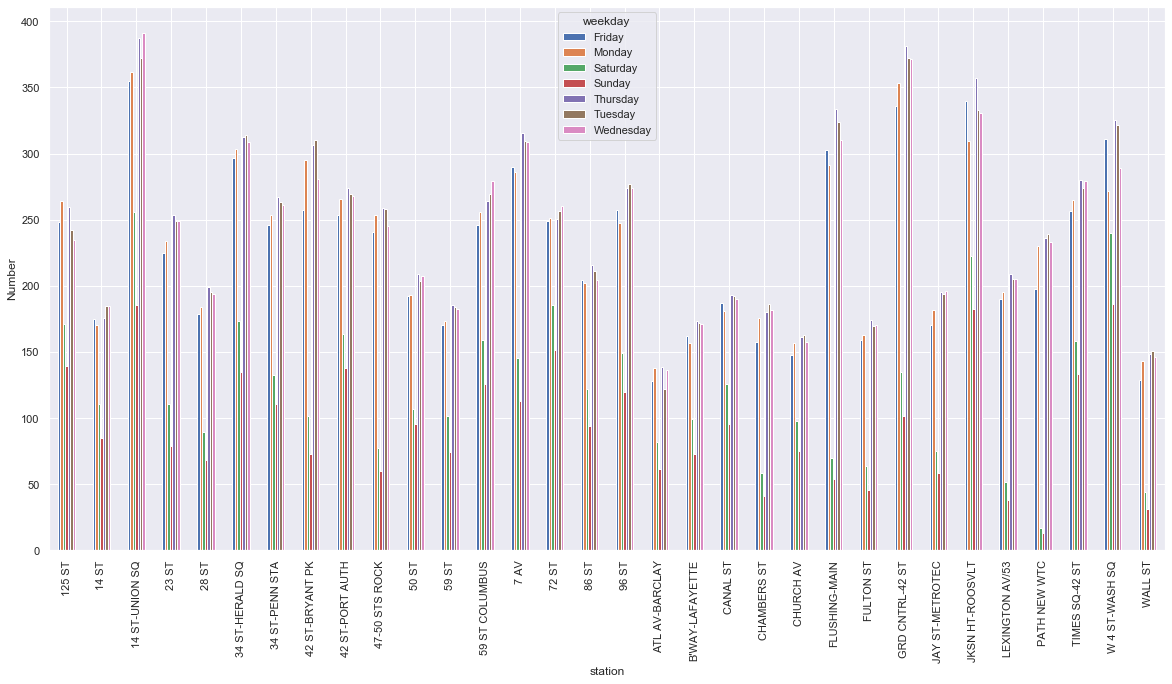

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
# use Seaborn styles
sns.set()
pd.pivot_table(df, index= 'station', columns= 'weekday', values= 'deltaEntry').plot(kind= 'bar', figsize = [20,10])
plt.ylabel("Number")



In [40]:
deltaExit_sorted.describe()



,entries,exits,deltaEntry,deltaExit
count,3.770000e+02,3.770000e+02,377.000000,377.000000
mean,3.164982e+07,3.388765e+07,253.533156,976.557029
std,1.969654e+08,2.040872e+08,661.367281,894.073232
min,1.000000e+00,3.060000e+02,0.000000,0.000000
25%,5.830700e+05,9.448360e+05,84.000000,450.000000
50%,2.722627e+06,4.527317e+06,167.000000,747.000000
75%,6.253092e+06,9.550954e+06,307.000000,1248.000000
max,1.999962e+09,1.979864e+09,12526.000000,10727.000000


In [44]:
df[df['station']].sample(20)
    
    
    

,station,division,date,time,desc,entries,exits,weekday,deltaEntry,deltaExit
161070,GRD CNTRL-42 ST,IRT,2019-10-27,01:00:00,REGULAR,8741536,2454511,Sunday,0,0
161294,GRD CNTRL-42 ST,IRT,2019-10-29,09:00:00,REGULAR,6278210,4056767,Tuesday,118,1111
160503,GRD CNTRL-42 ST,IRT,2019-10-31,04:00:00,REGULAR,228923,8632,Thursday,43,12
160205,GRD CNTRL-42 ST,IRT,2019-11-01,12:00:00,REGULAR,28,46,Friday,0,0
160848,GRD CNTRL-42 ST,IRT,2019-11-01,01:00:00,REGULAR,7333763,11276378,Friday,0,0
160778,GRD CNTRL-42 ST,IRT,2019-10-27,09:00:00,REGULAR,1710039,2359349,Sunday,0,1
158422,GRD CNTRL-42 ST,IRT,2019-10-29,13:00:00,REGULAR,937989,1890656,Tuesday,143,784
160658,GRD CNTRL-42 ST,IRT,2019-10-28,09:00:00,REGULAR,1248897,1655719,Monday,49,2340
158427,GRD CNTRL-42 ST,IRT,2019-10-30,09:00:00,REGULAR,939378,1892656,Wednesday,67,667
159920,GRD CNTRL-42 ST,IRT,2019-10-27,00:00:00,REGULAR,0,1068,Sunday,0,0


### Filtering df for Weekdays

In [48]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']
top20_weekday_df = df[df['weekday'].isin(weekdays)]
top20_weekday_df['weekday'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

### Trying to plot the deltaEntry by station by weekday

Text(0, 0.5, 'Number')

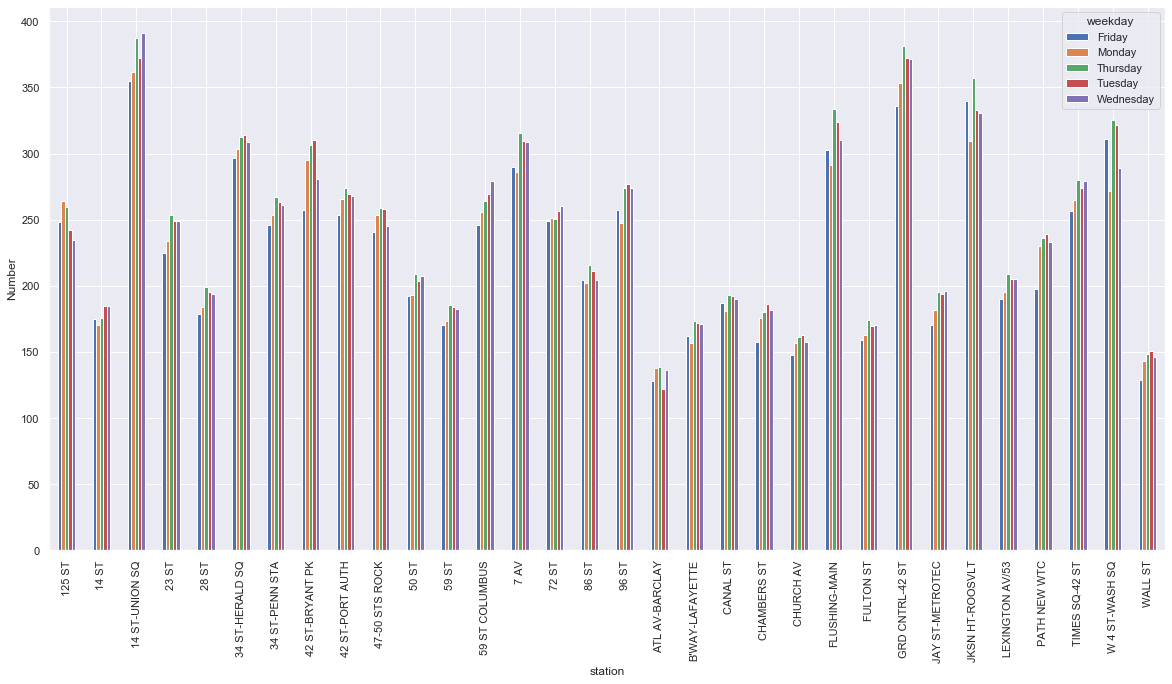

In [50]:
sns.set()
pd.pivot_table(top20_weekday_df, index= 'station', columns= 'weekday', values= 'deltaEntry').plot(kind= 'bar', figsize=[20,10])
plt.ylabel("Number")

<Figure size 2880x2160 with 0 Axes>

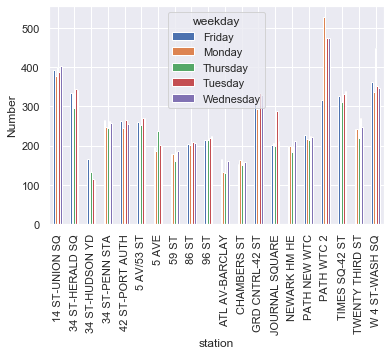

<Figure size 2880x2160 with 0 Axes>

In [74]:
sns.set()
pd.pivot_table(top20_weekday_df, index= 'station', columns= 'weekday', values= 'deltaExit').plot(kind= 'bar')
plt.ylabel("Number")
plt.figure(figsize=(40, 30))

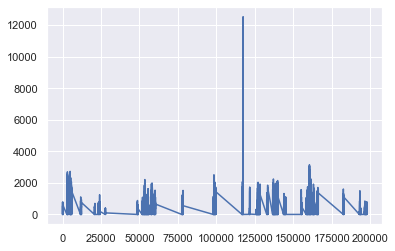

In [83]:
y_val = top20_weekday_df['deltaEntry']
plt.plot(y_val)

### Boxplot of weekday vs. deltaExit

(0, 5000)

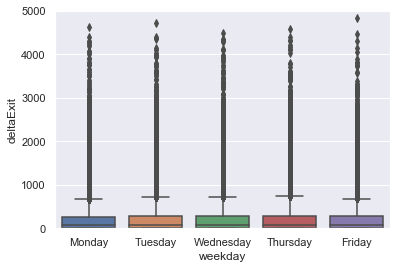

In [61]:
import matplotlib.pyplot as plt
cols = ['weekday','deltaExit']
data_box = top20_weekday_df[cols]
ax = sns.boxplot(x='weekday', y='deltaExit', data=top20_weekday_df)
plt.ylim(0, 5000)


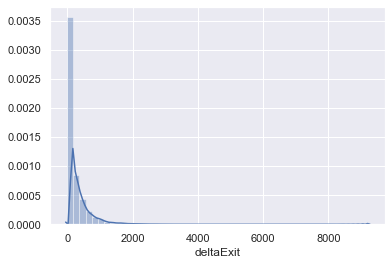

In [52]:
tuesday_data = top20_weekday_df[top20_weekday_df['weekday'] == 'Tuesday']
tues_box = sns.distplot(top20_weekday_df['deltaExit'])

ValueError: x and y must have same first dimension, but have shapes (5,) and (23940,)

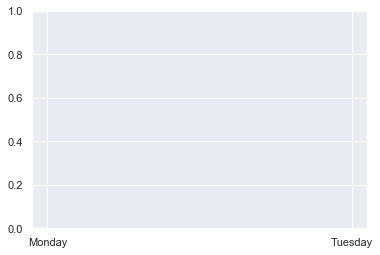

In [99]:
plt.plot(,y_val,kind='bar')